## Teste Técnico - Programa Trainee triggo.ai 2025

### Other packages used in this notebook

In [99]:
# %pip install numpy
# %pip install pandas

# %pip install duckdb
# %pip install kagglehub

# %pip install matplotlib
# %pip install seaborn

# %pip install geopy

### Imports

In [100]:
import numpy as np
import pandas as pd
import duckdb
import kagglehub

import matplotlib.pyplot as plt
import seaborn as sns

from geopy import distance 

# Part 1:

## Data Loading and Cleaning

This project is divided in 4 parts and each part have it's own particular questions:
- Data cleaning and modelling.
    - Importing the dataset .csv file from Kaggle ("olistbr/brazilian-ecommerce")
    - Data cleaning and normalizing
    - Creation of a relational data modelling
    - Describing each step in the data prep

### Kaggle dataset download

In [101]:
# Download latest version
path = kagglehub.dataset_download("olistbr/brazilian-ecommerce")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\Lucas.Batista\.cache\kagglehub\datasets\olistbr\brazilian-ecommerce\versions\2


### Reading the datasets into Pandas DataFrames

Listing all the 9 datasets and describing them:

- olist_customers_dataset.csv
    - Contains information about the customers
    - Raw column names: customer_id, customer_unique_id, customer_zip_code_prefix, customer_city and customer_state
- olist_geolocation_dataset.csv
    - Contains geolocalization information of every geolocation in the dataset
    - Raw column names: geolocation_zip_code_prefix, geolocation_lat, geolocation_lng, geolocation_city, geolocation_state
- olist_order_items_dataset.csv
    - Contains information about the customers
    - Raw column names: order_id, order_item_id, product_id, seller_id, shipping_limit_date, price, freight_value
- olist_order_payments_dataset.csv
    - Contains information the orders payments
    - Raw column names: order_id, payment_sequential, payment_type, payment_installments, payment_value
- olist_order_reviews_dataset.csv
    - Contains information about the reviews from customers for every order
    - Raw column names: review_id, order_id, review_score, review_comment_title, review_comment_message, review_creation_date, review_answer_timest
- olist_orders_dataset.csv
    - Contains information about orders details
    - Raw column names: order_id,customer_id, order_status, order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date,order_estimated_delivery_date
- olist_products_dataset
    - Contains information about products details
    - Raw column names: product_id, product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
- olist_sellers_dataset
    - Contains information about the sellers
    - Raw column names: seller_id, seller_zip_code_prefix, seller_city, seller_state
- product_category_name_translation
    - Contains name translations, wont be used in this project

![Table Diagram](<Table Diagram.png>)

- Defining a function to convert timestamp to date
- Defining a function to fill null comments

In [102]:
def convert_to_date(df, column_name):
    for col in column_name:
        df[col] = pd.to_datetime(df[col]).dt.date
    return df

def fill_null_review(df, column_name):
    for col in column_name:
        df[col] = df[col].fillna(value = 'No review')
    return df

### Read the olist_customers_dataset.csv into df_customers


In [103]:
dtype = {'customer_zip_code_prefix': 'string'}

df_customers = pd.read_csv(path + r"\olist_customers_dataset.csv", dtype=dtype)

df_customers['customer_city'] = df_customers['customer_city'].str.title()

df_customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,Franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,09790,Sao Bernardo Do Campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,01151,Sao Paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,08775,Mogi Das Cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,Campinas,SP


### Read the olist_geolocation_dataset.csv into df_geolocation


In [104]:
dtype = {'geolocation_zip_code_prefix': 'string'}

df_geolocation = pd.read_csv(path + r"\olist_geolocation_dataset.csv", dtype=dtype)

df_geolocation['geolocation_city'] = df_geolocation['geolocation_city'].str.title()

df_geolocation.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,01037,-23.545621,-46.639292,Sao Paulo,SP
1,01046,-23.546081,-46.644820,Sao Paulo,SP
2,01046,-23.546129,-46.642951,Sao Paulo,SP
3,01041,-23.544392,-46.639499,Sao Paulo,SP
4,01035,-23.541578,-46.641607,Sao Paulo,SP


### Read the olist_order_items_dataset.csv into df_order_items


In [105]:
parse_dates = ['shipping_limit_date']

df_order_items = pd.read_csv(path + r"\olist_order_items_dataset.csv", parse_dates=parse_dates)

df_order_items = convert_to_date(df_order_items, parse_dates)

df_order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13,199.90,18.14


### Read the olist_order_payments_dataset.csv to df_order_payments


In [106]:
df_order_payments = pd.read_csv(path + r"\olist_order_payments_dataset.csv")

df_order_payments['payment_type'] = df_order_payments['payment_type'].str.replace("_", " ")
df_order_payments['payment_type'] = df_order_payments['payment_type'].str.title()

df_order_payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,Credit Card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,Credit Card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,Credit Card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,Credit Card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,Credit Card,2,128.45


### Read the olist_order_reviews_dataset.csv to df_order_reviews


In [107]:
parse_dates = ['review_creation_date', 'review_answer_timestamp']
comment_columns = ['review_comment_title', 'review_comment_message']

df_order_reviews = pd.read_csv(path + r"\olist_order_reviews_dataset.csv", parse_dates=parse_dates)

df_order_reviews = convert_to_date(df_order_reviews, parse_dates)

df_order_reviews = fill_null_review(df_order_reviews, comment_columns)

df_order_reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,No review,No review,2018-01-18,2018-01-18
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,No review,No review,2018-03-10,2018-03-11
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,No review,No review,2018-02-17,2018-02-18
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,No review,Recebi bem antes do prazo estipulado.,2017-04-21,2017-04-21
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,No review,Parabéns lojas lannister adorei comprar pela I...,2018-03-01,2018-03-02


### Read the olist_orders_dataset.csv to df_orders


In [108]:
parse_dates = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']

df_orders = pd.read_csv(path + r"\olist_orders_dataset.csv", parse_dates=parse_dates)

df_orders = convert_to_date(df_orders, parse_dates)

df_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02,2017-10-02,2017-10-04,2017-10-10,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24,2018-07-26,2018-07-26,2018-08-07,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08,2018-08-08,2018-08-08,2018-08-17,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18,2017-11-18,2017-11-22,2017-12-02,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13,2018-02-13,2018-02-14,2018-02-16,2018-02-26


### Read the olist_products_dataset.csv to df_products

Remove underlines and capitalize first letters from product_category_name

In [109]:
df_products = pd.read_csv(path + r"\olist_products_dataset.csv")

df_products['product_category_name'] = df_products['product_category_name'].str.replace("_", " ")
df_products['product_category_name'] = df_products['product_category_name'].str.title()

df_products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,Perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,Artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,Esporte Lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,Bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,Utilidades Domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


### Read the olist_sellers_dataset.csv to df_sellers

- First letters up using the title() method

In [110]:
dtype = {'seller_zip_code_prefix': 'string'}

df_sellers = pd.read_csv(path + r"\olist_sellers_dataset.csv", dtype=dtype)

df_sellers['seller_city'] = df_sellers['seller_city'].str.title()

df_sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,Campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,Mogi Guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,Rio De Janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,04195,Sao Paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,Braganca Paulista,SP


# Part 2:

## Exploratory Analysis

- Exploratory analysis using SQL and Python
    - Orders volume per month and its seasonality
    - The distribution of orders delivery time
    - The relationship between delivery costs and delivery distance
    - Which are the best-selling products in revenue
    - Brazilian states with the highest average order value

### Orders volume per month and its seasonality

Here I used datetrunc to get the months of every date, then format with strftime, to get only a Month date. If datepart was used it would return an Integer instead of a String, so I prefer this way.

In [111]:
orders_per_month = duckdb.query(
                                    """
                                    SELECT 
                                        strftime(datetrunc('month', order_purchase_timestamp), '%m') AS month, 
                                        COUNT(order_id) AS count_orders 
                                    FROM df_orders 
                                    GROUP BY month 
                                    ORDER BY month
                                    """

                                ).df()

orders_per_month

,month,count_orders
0,01,8069
1,02,8508
2,03,9893
3,04,9343
4,05,10573
5,06,9412
6,07,10318
7,08,10843
8,09,4305
9,10,4959


### Months of August, May and July were the top 3 orders per months

Im using iloc to get the first and second columns

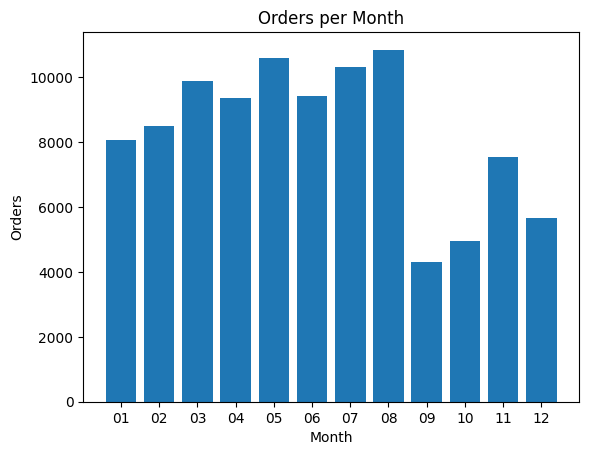

In [112]:
month = orders_per_month.iloc[:, 0]
count_orders = orders_per_month.iloc[:, 1]

plt.bar(month, count_orders)
plt.title('Orders per Month')
plt.xlabel('Month')
plt.ylabel('Orders')
plt.show()


### The Distribution of orders delivery time

To calculate the delivery time, Im using the order_delivered_customer_date as delivery time and the order_approved_at when the timer to the order be shipped

Calculating the mode of the dataset, to get the most frequent day to delivery

Selection only orders with the order_status = delivered

In [113]:
order_delivery_time = duckdb.query(
                                    """
                                    SELECT
                                        order_id, 
                                        datediff('day', order_approved_at, order_delivered_customer_date) AS day_to_delivery 
                                    FROM df_orders 
                                    WHERE order_status = 'delivered'
                                    """

                                ).df()

print('Mode: ', order_delivery_time.day_to_delivery.mode())

Mode:  0    7
Name: day_to_delivery, dtype: Int64


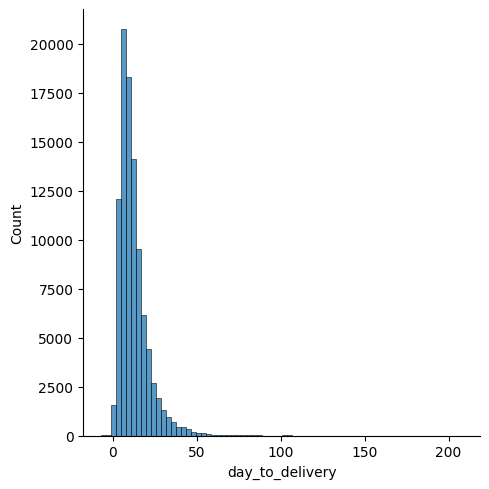

In [114]:
sns.displot(order_delivery_time, x="day_to_delivery", binwidth=3)

### SQL JOINs to get the right data from the multiple tables

- Starting with Customer table joining Geolocation table, to get the latitute and longitude from each customer
- As latitude and Longitude coulh have multiple values for each zip code, I decided to use the AVG function to get an average of each location
- Then joining Customer table with Orders table to get the order_id

In [115]:
customer_geo = duckdb.query(
"""
  SELECT
    c.customer_unique_id,
    c.customer_zip_code_prefix,
    c.customer_city,
    c.customer_state,
    o.order_id,
    COALESCE(o.order_approved_at, o.order_purchase_timestamp) AS order_approved_at,
    o.order_delivered_customer_date,
    o.order_estimated_delivery_date,
    AVG(g.geolocation_lat) AS customer_lat,
    AVG(g.geolocation_lng) AS customer_lng
  FROM
    df_customers AS c
  INNER JOIN
    df_geolocation AS g
      ON c.customer_zip_code_prefix = g.geolocation_zip_code_prefix
      AND c.customer_city = g.geolocation_city
      AND c.customer_state = g.geolocation_state
  INNER JOIN 
    df_orders AS o
      ON c.customer_id = o.customer_id
      AND order_status = 'delivered'
  GROUP BY
    1,2,3,4,5,6,7,8
"""
).df()

customer_geo.head()

,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_approved_at,order_delivered_customer_date,order_estimated_delivery_date,customer_lat,customer_lng
0,9f8764a30273ecb4c271ef11f961a7c4,04745,Sao Paulo,SP,501ce8d70f48706ea5befe3ff2717cb4,2018-04-20,2018-04-27,2018-05-14,-23.656198,-46.705168
1,a1b3ac2f0a874e9c8f368ad87b7e6cca,04721,Sao Paulo,SP,69ab7fdbd887d055b05826a8cc5591d7,2017-02-09,2017-02-14,2017-03-06,-23.640955,-46.700415
2,256f8c4d78dd11d21b17b36d3296053f,04728,Sao Paulo,SP,84b534c4e6899dae169caa25fa2c887c,2018-04-24,2018-04-28,2018-05-14,-23.639488,-46.714587
3,cd2624b9b75d83efb640f7204232511e,04753,Sao Paulo,SP,4df92d82d79c3b52c7138679fa9b07fc,2018-07-29,2018-07-27,2018-08-06,-23.654136,-46.713723
4,e77f97a4b49c999460c0e213e298f944,04710,Sao Paulo,SP,9c5bc3c2933ce8e4660ec888ffb28748,2017-09-15,2017-09-21,2017-10-04,-23.627634,-46.695728


Joining the customer_geo table with df_order_items, to get some metrics and to join with df_products, to get products metrics, for usage in the freight calculation 

In [116]:

order_products = duckdb.query(
"""
  SELECT
    cg.customer_unique_id,
    cg.customer_zip_code_prefix,
    cg.customer_city,
    cg.customer_state,
    cg.customer_lat,
    cg.customer_lng,
    cg.order_id,
    cg.order_approved_at,
    cg.order_delivered_customer_date,
    cg.order_estimated_delivery_date, 
    oi.seller_id,
    oi.product_id,
    oi.price,
    oi.freight_value,
    p.product_category_name
  FROM 
    customer_geo AS cg
  INNER JOIN   
    df_order_items AS oi
      ON cg.order_id = oi.order_id
  INNER JOIN   
    df_products AS p
      ON oi.product_id = p.product_id
"""
).df()

order_products

,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,customer_lat,customer_lng,order_id,order_approved_at,order_delivered_customer_date,order_estimated_delivery_date,seller_id,product_id,price,freight_value,product_category_name
0,9f8764a30273ecb4c271ef11f961a7c4,04745,Sao Paulo,SP,-23.656198,-46.705168,501ce8d70f48706ea5befe3ff2717cb4,2018-04-20,2018-04-27,2018-05-14,391fc6631aebcf3004804e51b40bcf1e,e0ce26ae52c9ab0b8c8e42129d6c1996,24.90,14.44,Moveis Decoracao
1,a1b3ac2f0a874e9c8f368ad87b7e6cca,04721,Sao Paulo,SP,-23.640955,-46.700415,69ab7fdbd887d055b05826a8cc5591d7,2017-02-09,2017-02-14,2017-03-06,2138ccb85b11a4ec1e37afbd1c8eda1f,48c4971ba55bfffcbf4f2805048b5944,19.90,8.72,Telefonia
2,256f8c4d78dd11d21b17b36d3296053f,04728,Sao Paulo,SP,-23.639488,-46.714587,84b534c4e6899dae169caa25fa2c887c,2018-04-24,2018-04-28,2018-05-14,a1043bafd471dff536d0c462352beb48,8c591ab0ca519558779df02023177f44,110.00,62.44,Ferramentas Jardim
3,cd2624b9b75d83efb640f7204232511e,04753,Sao Paulo,SP,-23.654136,-46.713723,4df92d82d79c3b52c7138679fa9b07fc,2018-07-29,2018-07-27,2018-08-06,1025f0e2d44d7041d6cf58b6550e0bfa,de533fe5b9448ea9792195806938dbf5,196.80,12.40,Moveis Decoracao
4,e77f97a4b49c999460c0e213e298f944,04710,Sao Paulo,SP,-23.627634,-46.695728,9c5bc3c2933ce8e4660ec888ffb28748,2017-09-15,2017-09-21,2017-10-04,165fc07beebdcb6190fba8a06db2a449,e81c3966e44d9ffb21a94481be3613d0,145.00,14.03,Informatica Acessorios
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109860,eae0a83d752b1dd32697e0e7b4221656,48410,Cicero Dantas,BA,-10.593017,-38.385186,71dab1155600756af6de79de92e712e3,2018-02-01,2018-03-12,2018-03-22,7c67e1448b00f6e969d365cea6b010ab,90b58782fdd04cb829667fcc41fb65f5,179.99,76.50,Moveis Escritorio
109861,eae0a83d752b1dd32697e0e7b4221656,48410,Cicero Dantas,BA,-10.593017,-38.385186,71dab1155600756af6de79de92e712e3,2018-02-01,2018-03-12,2018-03-22,7c67e1448b00f6e969d365cea6b010ab,308e4e21ae228a10f6370a243ae59995,76.99,40.69,Moveis Escritorio
109862,eae0a83d752b1dd32697e0e7b4221656,48410,Cicero Dantas,BA,-10.593017,-38.385186,71dab1155600756af6de79de92e712e3,2018-02-01,2018-03-12,2018-03-22,7c67e1448b00f6e969d365cea6b010ab,90b58782fdd04cb829667fcc41fb65f5,179.99,76.50,Moveis Escritorio
109863,eae0a83d752b1dd32697e0e7b4221656,48410,Cicero Dantas,BA,-10.593017,-38.385186,71dab1155600756af6de79de92e712e3,2018-02-01,2018-03-12,2018-03-22,7c67e1448b00f6e969d365cea6b010ab,308e4e21ae228a10f6370a243ae59995,76.99,40.69,Moveis Escritorio


- Joining the seller_df and the geolocation_df to get the seller localization
- Again, using the AVG function to get an average of each zip_code

In [117]:

seller_geo = duckdb.query(
"""
  SELECT
    s.seller_id,
    s.seller_zip_code_prefix,
    s.seller_city,
    s.seller_state,
    AVG(g.geolocation_lat) AS seller_lat,
    AVG(g.geolocation_lng) AS seller_lng
  FROM
    df_sellers AS s
  INNER JOIN
    df_geolocation AS g
      ON s.seller_zip_code_prefix = g.geolocation_zip_code_prefix
      AND s.seller_city = g.geolocation_city
      AND s.seller_state = g.geolocation_state
  GROUP BY
    1,2,3,4
"""
).df()

seller_geo.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state,seller_lat,seller_lng
0,b1aaae6b66ad3c40f54b389d7ea4bee0,04714,Sao Paulo,SP,-23.631886,-46.700263
1,bba3293d6f5d5af2f415e004e8b93ae3,04726,Sao Paulo,SP,-23.636112,-46.713011
2,955fee9216a65b617aa5c0531780ce60,04782,Sao Paulo,SP,-23.691093,-46.703699
3,1bb3812d5f0747a3ab7348f199001a10,04708,Sao Paulo,SP,-23.629423,-46.692138
4,a5bff0f43eb51f0cad7c37fac7244c8a,04827,Sao Paulo,SP,-23.721669,-46.701623


- Joining the order_products with the seller_geo df to get the sellers data
- Joining order_products with the df_order_reviews, and get the review score
- Use the coalesce function to give a 0 to the review_score in case it was NULL (the customer didnt review)

In [118]:
master_table = duckdb.query(
"""
  SELECT
    op.order_id,
    coalesce(r.review_score,0) AS review_score,
    order_approved_at,
    order_delivered_customer_date,
    order_estimated_delivery_date, 

    product_id,
    price,
    freight_value,
    product_category_name,

    customer_unique_id,
    customer_zip_code_prefix,
    customer_city,
    customer_state,
    customer_lat,
    customer_lng,

    s.seller_id,
    s.seller_zip_code_prefix,
    s.seller_city,
    s.seller_state,
    seller_lat,
    seller_lng
  FROM
    order_products AS op
  INNER JOIN
    seller_geo AS s
      ON op.seller_id = s.seller_id
  LEFT JOIN
    df_order_reviews AS r
      ON op.order_id = r.order_id
"""
).df()

master_table

,order_id,review_score,order_approved_at,order_delivered_customer_date,order_estimated_delivery_date,product_id,price,freight_value,product_category_name,customer_unique_id,...,customer_city,customer_state,customer_lat,customer_lng,seller_id,seller_zip_code_prefix,seller_city,seller_state,seller_lat,seller_lng
0,0544030711e50ec2cb6c15764d22891a,1,2018-04-14,2018-04-30,2018-05-02,8d12ee985749e3ea570ed7f5c875479a,14.30,18.23,Eletrodomesticos,0e850ed5adc4abe0346435eda5b1a626,...,Niteroi,RJ,-22.903197,-43.106920,d91fb3b7d041e83b64a00a3edfb37e4f,11704,Praia Grande,SP,-24.026526,-46.478237
1,f95884da9f9e2df5d430f7e289b3c07e,1,2017-12-09,2017-12-15,2017-12-29,398eb7af23a74b3470f90b1744a48697,149.99,10.06,Brinquedos,5e75cfd56320dc660aea5d370b695a64,...,Niteroi,RJ,-22.874818,-43.083328,46dc3b2cc0980fb8ec44634e21d2718e,22240,Rio De Janeiro,RJ,-22.935263,-43.187264
2,bc26562fb9717b24a6b7b1b4b7ee642f,5,2017-04-07,2017-05-04,2017-04-28,bbc9e653c2f5794542ac3867ab5ab757,36.50,15.56,Cama Mesa Banho,55eba592aeb0505e92a1db72d8d2a038,...,Niteroi,RJ,-22.900392,-43.127546,0c8380b62e38e8a1e6adbeba7eb9688c,37410,Tres Coracoes,MG,-21.693435,-45.259901
3,2ff04f721a0ccf086506b4ba443d924a,4,2018-08-14,2018-08-17,2018-08-24,0129d1e9b29d3fe6833cc922374cd252,16.90,15.23,Consoles Games,e9ec2f184c59b9d4681069ade725ecd7,...,Niteroi,RJ,-22.900392,-43.127546,080102cd0a76b09e0dcf55fcacc60e05,31140,Belo Horizonte,MG,-19.894574,-43.931235
4,011c899816ea29773525bd3322dbb6aa,2,2018-05-01,2018-05-15,2018-05-24,53b36df67ebb7c41585e8d54d6772e08,99.90,0.00,Relogios Presentes,6a9501d542243cbdd043c91a66795279,...,Niteroi,RJ,-22.900392,-43.127546,7d13fca15225358621be4086e1eb0964,14050,Ribeirao Preto,SP,-21.173171,-47.823574
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107488,084ac8d010dca0cb81b1bd4f375a047e,0,2018-02-16,2018-02-26,2018-03-07,a7329b3e52d13627c92b24a745e70873,59.00,16.17,Moveis Decoracao,7e1681f9bb31800364869a2cdbe289db,...,Rio De Janeiro,RJ,-22.931071,-43.176116,6fc26fe110feebd80a433e1f012a84f9,15601,Fernandopolis,SP,-20.292818,-50.254541
107489,4c3428283da9b354465abf10f72f556e,0,2018-02-07,2018-02-27,2018-03-07,83639e59e789cf2ed557ebf817f1085c,49.90,15.10,Fashion Underwear E Moda Praia,0efe8edcbf297127eb1a192bb91895c7,...,Ribeirao Das Neves,MG,-19.805113,-44.025654,a6fe7de3d16f6149ffe280349a8535a0,14401,Franca,SP,-20.528619,-47.387410
107490,cfec5af5f95fd772fb3c0891654a24b7,0,2017-11-11,2017-11-26,2017-12-07,84f456958365164420cfc80fbe4c7fab,99.00,17.94,Cama Mesa Banho,38e5d10b2cb0da6ff0642b40ff4b2996,...,Marica,RJ,-22.934535,-42.911753,4a3ca9315b744ce9f8e9374361493884,14940,Ibitinga,SP,-21.757321,-48.829744
107491,2da01b4da104add683f87af323a0e9d1,0,2018-08-01,2018-08-13,2018-09-06,3f55ca21769e7535d3ba989450207285,47.64,22.26,Perfumaria,3ebd2e5f948dbd9d5165184b5ca781b2,...,Mesquita,RJ,-22.781707,-43.425522,33c51922b6e3c16b24a8f28e5833c99d,86010,Londrina,PR,-23.318127,-51.157136


### Using the lib GeoPY its possible to calculate the distance between two point using the latitude and longitude

In [157]:
def calculate_distance(row):
    customer_location = (row['customer_lat'], row['customer_lng'])
    seller_location = (row['seller_lat'], row['seller_lng'])
    return distance.distance(customer_location, seller_location).km


master_table['delivery_distance'] = master_table.apply(calculate_distance, axis=1)

master_table

,order_id,review_score,order_approved_at,order_delivered_customer_date,order_estimated_delivery_date,product_id,price,freight_value,product_category_name,customer_unique_id,...,customer_state,customer_lat,customer_lng,seller_id,seller_zip_code_prefix,seller_city,seller_state,seller_lat,seller_lng,delivery_distance
0,0544030711e50ec2cb6c15764d22891a,1,2018-04-14,2018-04-30,2018-05-02,8d12ee985749e3ea570ed7f5c875479a,14.30,18.23,Eletrodomesticos,0e850ed5adc4abe0346435eda5b1a626,...,RJ,-22.903197,-43.106920,d91fb3b7d041e83b64a00a3edfb37e4f,11704,Praia Grande,SP,-24.026526,-46.478237,366.204743
1,f95884da9f9e2df5d430f7e289b3c07e,1,2017-12-09,2017-12-15,2017-12-29,398eb7af23a74b3470f90b1744a48697,149.99,10.06,Brinquedos,5e75cfd56320dc660aea5d370b695a64,...,RJ,-22.874818,-43.083328,46dc3b2cc0980fb8ec44634e21d2718e,22240,Rio De Janeiro,RJ,-22.935263,-43.187264,12.590117
2,bc26562fb9717b24a6b7b1b4b7ee642f,5,2017-04-07,2017-05-04,2017-04-28,bbc9e653c2f5794542ac3867ab5ab757,36.50,15.56,Cama Mesa Banho,55eba592aeb0505e92a1db72d8d2a038,...,RJ,-22.900392,-43.127546,0c8380b62e38e8a1e6adbeba7eb9688c,37410,Tres Coracoes,MG,-21.693435,-45.259901,257.178346
3,2ff04f721a0ccf086506b4ba443d924a,4,2018-08-14,2018-08-17,2018-08-24,0129d1e9b29d3fe6833cc922374cd252,16.90,15.23,Consoles Games,e9ec2f184c59b9d4681069ade725ecd7,...,RJ,-22.900392,-43.127546,080102cd0a76b09e0dcf55fcacc60e05,31140,Belo Horizonte,MG,-19.894574,-43.931235,343.083278
4,011c899816ea29773525bd3322dbb6aa,2,2018-05-01,2018-05-15,2018-05-24,53b36df67ebb7c41585e8d54d6772e08,99.90,0.00,Relogios Presentes,6a9501d542243cbdd043c91a66795279,...,RJ,-22.900392,-43.127546,7d13fca15225358621be4086e1eb0964,14050,Ribeirao Preto,SP,-21.173171,-47.823574,521.116133
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107488,084ac8d010dca0cb81b1bd4f375a047e,0,2018-02-16,2018-02-26,2018-03-07,a7329b3e52d13627c92b24a745e70873,59.00,16.17,Moveis Decoracao,7e1681f9bb31800364869a2cdbe289db,...,RJ,-22.931071,-43.176116,6fc26fe110feebd80a433e1f012a84f9,15601,Fernandopolis,SP,-20.292818,-50.254541,788.830015
107489,4c3428283da9b354465abf10f72f556e,0,2018-02-07,2018-02-27,2018-03-07,83639e59e789cf2ed557ebf817f1085c,49.90,15.10,Fashion Underwear E Moda Praia,0efe8edcbf297127eb1a192bb91895c7,...,MG,-19.805113,-44.025654,a6fe7de3d16f6149ffe280349a8535a0,14401,Franca,SP,-20.528619,-47.387410,360.429021
107490,cfec5af5f95fd772fb3c0891654a24b7,0,2017-11-11,2017-11-26,2017-12-07,84f456958365164420cfc80fbe4c7fab,99.00,17.94,Cama Mesa Banho,38e5d10b2cb0da6ff0642b40ff4b2996,...,RJ,-22.934535,-42.911753,4a3ca9315b744ce9f8e9374361493884,14940,Ibitinga,SP,-21.757321,-48.829744,623.339251
107491,2da01b4da104add683f87af323a0e9d1,0,2018-08-01,2018-08-13,2018-09-06,3f55ca21769e7535d3ba989450207285,47.64,22.26,Perfumaria,3ebd2e5f948dbd9d5165184b5ca781b2,...,RJ,-22.781707,-43.425522,33c51922b6e3c16b24a8f28e5833c99d,86010,Londrina,PR,-23.318127,-51.157136,794.500174


### Calculating the relationship between freigth cost and distance

In [159]:
cents_per_km = duckdb.query(
"""
    SELECT
        order_id,
        product_id,
        product_category_name,
        freight_value,
        CASE WHEN delivery_distance < 1 THEN 1 ELSE delivery_distancE END AS delivery_distance,
        freight_value / (CASE WHEN delivery_distance < 1 THEN 1 ELSE delivery_distance END) AS price_per_km  
    FROM
        master_table
"""
).df()

cents_per_km

,order_id,product_id,product_category_name,freight_value,delivery_distance,price_per_km
0,0544030711e50ec2cb6c15764d22891a,8d12ee985749e3ea570ed7f5c875479a,Eletrodomesticos,18.23,366.204743,0.049781
1,f95884da9f9e2df5d430f7e289b3c07e,398eb7af23a74b3470f90b1744a48697,Brinquedos,10.06,12.590117,0.799039
2,bc26562fb9717b24a6b7b1b4b7ee642f,bbc9e653c2f5794542ac3867ab5ab757,Cama Mesa Banho,15.56,257.178346,0.060503
3,2ff04f721a0ccf086506b4ba443d924a,0129d1e9b29d3fe6833cc922374cd252,Consoles Games,15.23,343.083278,0.044392
4,011c899816ea29773525bd3322dbb6aa,53b36df67ebb7c41585e8d54d6772e08,Relogios Presentes,0.00,521.116133,0.000000
...,...,...,...,...,...,...
107488,084ac8d010dca0cb81b1bd4f375a047e,a7329b3e52d13627c92b24a745e70873,Moveis Decoracao,16.17,788.830015,0.020499
107489,4c3428283da9b354465abf10f72f556e,83639e59e789cf2ed557ebf817f1085c,Fashion Underwear E Moda Praia,15.10,360.429021,0.041895
107490,cfec5af5f95fd772fb3c0891654a24b7,84f456958365164420cfc80fbe4c7fab,Cama Mesa Banho,17.94,623.339251,0.028780
107491,2da01b4da104add683f87af323a0e9d1,3f55ca21769e7535d3ba989450207285,Perfumaria,22.26,794.500174,0.028018


### Analysis of the Freight values

Grouped by Product Category with its minimum, maximum and the average

In [123]:
freight_analysis = duckdb.query(
"""
    SELECT
        product_category_name,
        MIN(price_per_km) AS min_price_per_km,
        MAX(price_per_km) AS max_price_per_km,
        AVG(price_per_km) AS avg_price_per_km
    FROM
        cents_per_km
    GROUP BY
        1
"""
).df()

freight_analysis

,product_category_name,min_price_per_km,max_price_per_km,avg_price_per_km
0,Utilidades Domesticas,0.000032,41.000000,0.220119
1,Papelaria,0.000029,42.090000,0.192174
2,None,0.000000,9.559867,0.170735
3,Malas Acessorios,0.006378,13.150974,0.214050
4,Fashion Calcados,0.008313,0.810394,0.044594
...,...,...,...,...
69,Eletrodomesticos 2,0.008784,6.995431,0.255200
70,Moveis Colchao E Estofado,0.019280,19.159602,1.628031
71,Eletrodomesticos,0.007145,2.877473,0.110755
72,Livros Tecnicos,0.005784,2.807795,0.223193


### Best Selling Products Categories

In [168]:
best_selling_products = duckdb.query(
"""
    SELECT
        product_category_name,
        COUNT(product_id) AS count_products,
        SUM(price) AS sum_price
    FROM
        master_table
    GROUP BY
        1
    ORDER BY 
        3 DESC
"""
).df()

best_selling_products

,product_category_name,count_products,sum_price
0,Beleza Saude,9285,1215949.50
1,Relogios Presentes,5837,1158718.40
2,Cama Mesa Banho,10978,1029541.58
3,Esporte Lazer,8047,892674.73
4,Informatica Acessorios,7546,868288.40
...,...,...,...
69,Flores,33,1110.04
70,Casa Conforto 2,30,760.27
71,Cds Dvds Musicais,14,730.00
72,Fashion Roupa Infanto Juvenil,7,519.95


### Which Brazilian States have the highest average order price 

In [169]:
highest_average_orders = duckdb.query(
"""
    SELECT
        customer_state,
        COUNT(product_id) AS count_products,
        AVG(price) AS avg_price
    FROM
        master_table
    GROUP BY
        1
    ORDER BY 
        3 DESC
"""
).df()

highest_average_orders

,customer_state,count_products,avg_price
0,PB,571,185.324939
1,AL,421,185.296841
2,AC,87,166.883103
3,AP,80,165.936375
4,PA,1034,160.392708
5,RO,260,158.831192
6,PI,507,155.953294
7,RN,510,155.403431
8,CE,1382,152.483234
9,SE,363,151.040028


# Part 3:

## Solving Business Problems

- Solving Business Problems
    - Retention analysis of recurring customers (one or more orders in the analysis period) and which insights could we extract
    - Late delivery prediction analysis:
        - Define what a late delivery is.
        - Use relevant fields to create the features for the model
        - Divide train and test datasets
        - Implement the prediction analisys using Random Forest Classifier
        - Evaluate the model performance and explain the results
    - Customer Segmentation: 
        - Segment the customers in groups
        - Do a behavior analysis  of each group and suggest marketing strategies for each one.
    - Customer Satisfaction: 
        - Explore the relationship between customer review score and other aspects, like product category, delivery time, average order price.
        - Identify the factors that impact the most

### Retention Analysis

Data preparation:
- Step 1: define the number of orders for each customer
- Step 2: calculate the order delivery On Time or Late and other metrics for both customers
- Step 3: analyse the results:
    - Average review score, Average Ticket, Quantity of products by State

In [142]:
recurrent_customer_id = duckdb.query(
"""
    WITH recurrent_customer_id AS (
        SELECT
            customer_unique_id,
            order_id,
            order_approved_at,
            SUM(price) AS sum_price,     
            ROW_NUMBER() OVER(PARTITION BY customer_unique_id ORDER BY order_approved_at) AS order_number    
        FROM
            master_table
        GROUP BY
            1,2,3
    )
    SELECT
        customer_unique_id        
    FROM
        recurrent_customer_id
    WHERE
        order_number > 1
"""
).df()

recurrent_customer_id

,customer_unique_id
0,012a218df8995d3ec3bb221828360c86
1,06a52782a04f0086d16b9c22d0e29438
2,06a52782a04f0086d16b9c22d0e29438
3,07f61caa1c9e850c14e94854cec87545
4,0f0b49d45120fcb28bda56e94bc85673
...,...
2960,eae0a83d752b1dd32697e0e7b4221656
2961,f0a8e36658d6d08f6e96b9ecf389fd52
2962,f172c33b146e90b95ee12499eb6632cb
2963,f561632522774ab728bb93f8f3ab5e61


In [170]:
customer_orders = duckdb.query(
"""
    SELECT
        mt.customer_unique_id,
        CASE
            WHEN rc.customer_unique_id IS NOT NULL THEN 'Recurrent Customer'
            ELSE 'Single Order Customer'  
        END AS customer_classification,
        customer_state,

        order_id,
        product_category_name,
        order_approved_at,
        order_estimated_delivery_date,
        order_delivered_customer_date,
        ROUND(delivery_distance, 2) AS delivery_distance,

        CASE
            WHEN date_diff('day', order_approved_at, order_estimated_delivery_date) -
                 date_diff('day', order_approved_at, order_delivered_customer_date) >= 0 THEN 'On Time Delivery'
            ELSE 'Late Delivery'
        END AS delivery_status,

        COALESCE(MAX(review_score),0) AS review_score,
        COUNT(product_id) AS qty_products,
        SUM(price) AS sum_price        
    FROM
        master_table AS mt
    LEFT JOIN
        recurrent_customer_id AS rc
        ON mt.customer_unique_id = rc.customer_unique_id
    GROUP BY
        1,2,3,4,5,6,7,8,9
    ORDER BY
        2
"""
).df()

customer_orders

,customer_unique_id,customer_classification,customer_state,order_id,product_category_name,order_approved_at,order_estimated_delivery_date,order_delivered_customer_date,delivery_distance,delivery_status,review_score,qty_products,sum_price
0,fe59d5878cd80080edbd29b5a0a4e1cf,Recurrent Customer,DF,806d3b5f15557ad3d5288d340271151f,Alimentos Bebidas,2017-08-14,2017-09-13,2017-08-23,862.63,On Time Delivery,3,2,77.98
1,4ced1b9f8668a9792e5484da6d97b229,Recurrent Customer,RJ,971edb451cad61fd96ae029b1248938e,Moveis Decoracao,2017-10-18,2017-11-08,2017-11-03,379.14,On Time Delivery,5,1,15.60
2,a9e070f61d35aa13e420c8597b5ccb3d,Recurrent Customer,MG,d18a9528e8077026b951849741ab227b,Relogios Presentes,2018-01-22,2018-02-14,2018-01-25,512.77,On Time Delivery,5,4,116.00
3,13473af264dea0facd893d6516900b22,Recurrent Customer,MG,90acf5654782a289ffd89f1759287595,Bebes,2017-11-24,2017-12-19,2017-12-11,832.87,On Time Delivery,5,1,29.90
4,b7b68a8bb6ca48aefdd5790e04cda817,Recurrent Customer,DF,02b09d03f22e1da491e4d578a0bc3f90,Relogios Presentes,2018-03-05,2018-03-22,2018-03-14,867.26,On Time Delivery,5,1,29.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
94955,367bcfba5e12cece52f787ab444eba28,Single Order Customer,SP,f8329ba7a0842d0bbed2f8a882fe442e,Cool Stuff,2017-11-26,2017-12-15,2017-12-13,490.39,On Time Delivery,5,1,69.90
94956,bfac60480d72a5918a84c48890cad2b6,Single Order Customer,SP,4cb20b515815d480b0dccbe2fa6ea5bc,Eletrodomesticos,2018-03-13,2018-03-29,2018-03-20,358.79,On Time Delivery,3,1,47.59
94957,c5eb4ef20f1bb764daf1936474b5e629,Single Order Customer,MA,a90935cd3ef2041119e57ab117b352c1,Fashion Calcados,2017-09-06,2017-09-29,2017-09-22,2364.13,On Time Delivery,5,1,27.90
94958,11301f075b107598442c6b33133b557a,Single Order Customer,PA,782c1d4000bc7ae3d9aef9046000c4f6,Malas Acessorios,2018-07-28,2018-08-22,2018-08-07,2656.48,On Time Delivery,5,1,399.00


- Calculate for each customer, how many times each delivery status, the quantity of orders and products, the total spend and the average review score 

In [172]:
customer_agg = duckdb.query(
"""
    SELECT
        customer_unique_id,
        customer_classification,
        customer_state,
        product_category_name,
        
        SUM(CASE WHEN delivery_status = 'On Time Delivery' THEN 1 ELSE 0 END) AS on_time_delivery,
        SUM(CASE WHEN delivery_status = 'Late Delivery' THEN 1 ELSE 0 END) AS late_delivery,

        COUNT(order_id) AS qty_orders,
        SUM(qty_products) AS qty_products,
        SUM(sum_price) AS total_spend,
        AVG(delivery_distance) AS avg_delivery_distance,
        AVG(review_score) AS avg_review_score
    FROM
        customer_orders
    GROUP BY
        1,2,3,4
    ORDER BY
        1
"""
).df()

customer_agg

,customer_unique_id,customer_classification,customer_state,product_category_name,on_time_delivery,late_delivery,qty_orders,qty_products,total_spend,avg_delivery_distance,avg_review_score
0,0000366f3b9a7992bf8c76cfdf3221e2,Single Order Customer,SP,Cama Mesa Banho,1.0,0.0,1,1.0,129.90,110.50,5.0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,Single Order Customer,SP,Beleza Saude,1.0,0.0,1,1.0,18.90,22.18,4.0
2,0000f46a3911fa3c0805444483337064,Single Order Customer,SC,Papelaria,1.0,0.0,1,1.0,69.00,515.36,3.0
3,0000f6ccb0745a6a4b88665a16c9f078,Single Order Customer,PA,Telefonia,1.0,0.0,1,1.0,25.99,2468.89,4.0
4,0004aac84e0df4da2b147fca70cf8255,Single Order Customer,SP,Telefonia,1.0,0.0,1,1.0,180.00,154.76,5.0
...,...,...,...,...,...,...,...,...,...,...,...
92967,fffcf5a5ff07b0908bd4e2dbc735a684,Single Order Customer,PE,Beleza Saude,1.0,0.0,1,2.0,1570.00,1990.42,5.0
92968,fffea47cd6d3cc0a88bd621562a9d061,Single Order Customer,BA,Bebes,1.0,0.0,1,1.0,64.89,1523.63,4.0
92969,ffff371b4d645b6ecea244b27531430a,Single Order Customer,MT,Automotivo,1.0,0.0,1,1.0,89.90,1524.92,5.0
92970,ffff5962728ec6157033ef9805bacc48,Single Order Customer,ES,Relogios Presentes,1.0,0.0,1,1.0,115.00,638.84,5.0


- Agregating per state and calculating the delivery percent, quantity orders and products, total spend and the average delivery distance and review score

In [174]:
customer_agg_recurrent = duckdb.query(
"""
    SELECT
        customer_state,
        
        ROUND(SUM(late_delivery) / SUM(qty_orders), 2) AS late_delivery_percent,

        SUM(qty_orders) AS qty_orders,
        SUM(qty_products) AS qty_products,
        ROUND(SUM(total_spend), 2) AS total_spend,
        ROUND(AVG(avg_delivery_distance), 2) AS avg_delivery_distance,
        ROUND(AVG(avg_review_score), 2) AS avg_review_score

    FROM
        customer_agg
    WHERE
        customer_classification = 'Recurrent Customer'
    GROUP BY
        1
    ORDER BY
        6 DESC
"""
).df()

customer_agg_recurrent

,customer_state,late_delivery_percent,qty_orders,qty_products,total_spend,avg_delivery_distance,avg_review_score
0,AC,0.22,9.0,10.0,1437.16,2596.51,2.75
1,AM,0.00,8.0,21.0,2297.70,2589.20,4.08
2,AP,0.00,2.0,4.0,469.70,2546.13,4.50
3,PA,0.13,46.0,60.0,6418.82,2310.85,3.53
4,MA,0.10,31.0,67.0,5950.02,2238.13,4.54
5,CE,0.10,40.0,51.0,4407.61,2230.96,4.00
6,RO,0.00,22.0,47.0,3408.52,2227.02,3.32
7,PB,0.10,21.0,34.0,5203.13,2167.37,3.85
8,RN,0.00,20.0,25.0,2668.63,2057.96,4.89
9,PE,0.08,79.0,186.0,15709.59,2046.67,4.09


With this Analysis we can afirm:
- When the average distance of delivery is higher then 1400km, there's a huge drop in total sales
- The most distant State also have the highest Late Delivery Percentage and lowest Average Review Score
- SP is the biggest state in quantity of orders, products and spend and also have the lowest Average Delivery Distance
- The higher Average Review Score, the lowest Late Delivery Percentage is 

## Late delivery prediction analysis:
- Define what a late delivery is.
- Use relevant fields to create the features for the model
- Divide train and test datasets
- Implement the prediction analisys using Random Forest Classifier
- Evaluate the model performance and explain the results


## Customer Segmentation: 
- Segment the customers in groups
- Do a behavior analysis  of each group and suggest marketing strategies for each one.


## Customer Satisfaction: 
- Explore the relationship between customer review score and other aspects, like product category, delivery time, average order price.
- Identify the factors that impact the most

In [ ]:
review score and delivery distance 

In [ ]:
review score and product category

In [ ]:
review score and delivery time

In [ ]:
review score and average order price

# Part 4:

## Data Visualization

- Visualization and Dashboarding
    - MoM Barchart of Orders filtered by Brazil States and Product Category
    - Heatmap of Orders by Region/Brazil States
    - Multiple graphs show the relationship between customer satisfaction and delivery time
    - A dashboard comparing different vendors with best performance in sales, customer satisfaction and delivery time